## eXplainable Machine Learning - Homework 3
Michał Siennicki


## 3.
Here we have two rows explaining two observations. Each of those rows consists of 3 plots of the same explanation.

Explanations in each row differ slightly because there is a random factor in the lime method. In the first row we can see that the order of variables is different between the second and the third plot (same in second row). Apart from that thy look almost identical.

| Random seed 1     | Random seed 2     | Random seed 3     |
|-------------------|-------------------|-------------------|
| ![](imgs/3/1.png) | ![](imgs/3/2.png) | ![](imgs/3/3.png) |
| ![](imgs/3/4.png) | ![](imgs/3/5.png) | ![](imgs/3/6.png) |


## 4.
Here there is a comparison between the shap values and the lime explanations on three observations.

As we can see those results are quite similar. Especially on the second example we can see the analogy.

In all three examples all displayed variables have the same sign of attribution (a variable is positive on both methods or negative on both).
However, the values of attribution differ. This is not surprising, those two methods work differently.

| Shap              | Lime              |
|-------------------|-------------------|
| ![](imgs/4/1.png) | ![](imgs/4/2.png) |
| ![](imgs/4/3.png) | ![](imgs/4/4.png) |
| ![](imgs/4/5.png) | ![](imgs/4/6.png) |


## 5.
First column is the random forest classifier, second is the logistic regression (linear model).

| Random forest classifier | Logistic regression |
|--------------------------|---------------------|
| ![](imgs/5/1.png)        | ![](imgs/5/2.png)   |
| ![](imgs/5/3.png)        | ![](imgs/5/4.png)   |

Again, the results from both models are quite similar.
In both examples all displayed variables have the same sigh of attribution (a variable is positive on both methods or negative on both).

The differences here are much higher than the variance in single model (task 3.) and comparable to difference between lime explanation and shap values.
Those models highly relies on categorical data so perhaps there is no such a big difference in the lime (explaining the model locally) and shap (globally), since local is almost global with categorical data + one hot encoding.

# Appendix

## 1.
Here the data is loaded (same as in previous homework) and a simple model is trained and evaluated. It is Random Forest Classifier from sklearn with default parameters.

Loading and preparing the data consists of:
- one hot encoding (models like logistic regression require this)
- splitting between target (y) and x

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import shap
import dalex as dx
from matplotlib import pyplot as plt

np.random.seed(42)


def load_data():
    df = pd.read_csv('heart.csv')

    # One hot encoding (for linear classifier)
    df = pd.get_dummies(df, columns=['caa', 'cp', 'restecg'])

    # Get targets
    y_all = df['output'].to_numpy()

    x_all = df.drop(columns=['output'])

    # Split data to train and test
    return train_test_split(x_all, y_all, test_size=0.2, random_state=42)


x_train, x_test, y_train, y_test = load_data()
print(f"{x_train.shape=}", f"{x_test.shape=}", f"{y_train.shape=}", f"{y_test.shape=}")

x_train.shape=(242, 22) x_test.shape=(61, 22) y_train.shape=(242,) y_test.shape=(61,)


Training the models

In [2]:
def get_model(verbose=False, model=None):
    if model is None:
        model = RandomForestClassifier()
    metrics = {
        "auc": roc_auc_score,
        "accuracy": accuracy_score
    }
    model.fit(x_train, y_train)
    pred_test = model.predict(x_test)
    if verbose:
        print({metric_name: metric_fun(y_test, pred_test) for metric_name, metric_fun in metrics.items()})

    return model

model = get_model(True)
model_linear = get_model(True, LogisticRegression())

{'auc': 0.8841594827586207, 'accuracy': 0.8852459016393442}
{'auc': 0.8685344827586206, 'accuracy': 0.8688524590163934}


Here are the model predictions on the first two observations from the test set

In [3]:
model.predict_proba(x_test.iloc[0:2])[:, 1]

array([0.06, 0.61])

## 2.

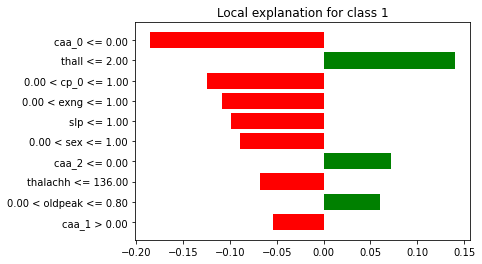

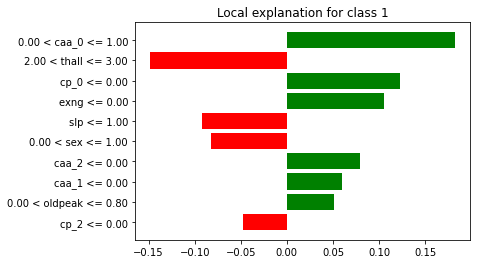

In [4]:
shap_explainer = shap.Explainer(model, x_train)
shap_explainer_linear = shap.Explainer(model_linear, x_train)
dalex_explainer = dx.Explainer(model, x_train, y_train, verbose=False)
dalex_explainer_linear = dx.Explainer(model_linear, x_train, y_train, verbose=False)


def plot_explain(i, method='lime', linear=False):
    df = x_test[i:i+1]

    if method == 'both':
        plt.figure() # else two plots are merged into one

    if method == 'shap' or method=='both':
        shap_values = (shap_explainer(df)[0, :, 1] if not linear else shap_explainer_linear(df)[0, :])
        shap.plots.waterfall(shap_values)
    if method == 'lime' or method=='both':
        explanation = (dalex_explainer if not linear else dalex_explainer_linear).predict_surrogate(df)
        explanation.plot()

plot_explain(0, method='lime')
plot_explain(1, method='lime')

## 3.

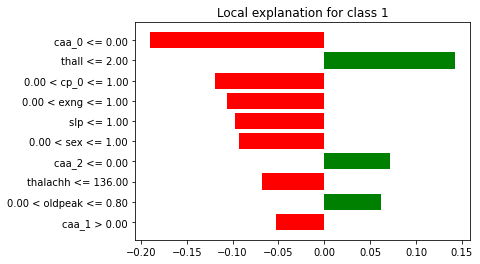

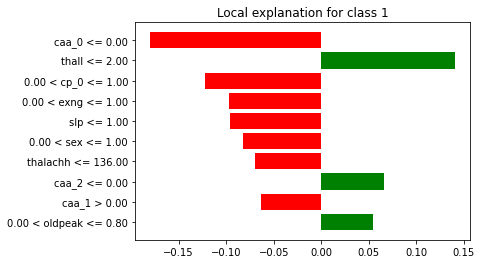

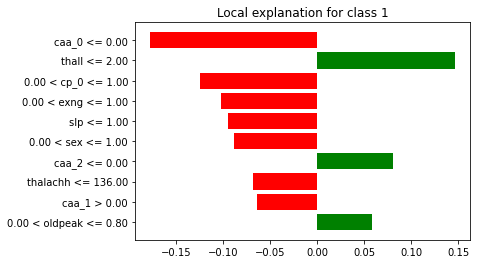

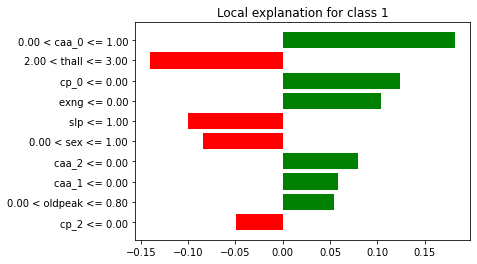

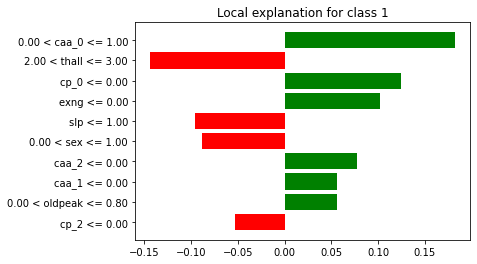

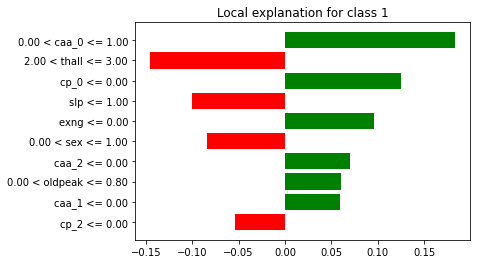

In [5]:
plot_explain(0, method='lime')
plot_explain(0, method='lime')
plot_explain(0, method='lime')
plot_explain(1, method='lime')
plot_explain(1, method='lime')
plot_explain(1, method='lime')

## 4.

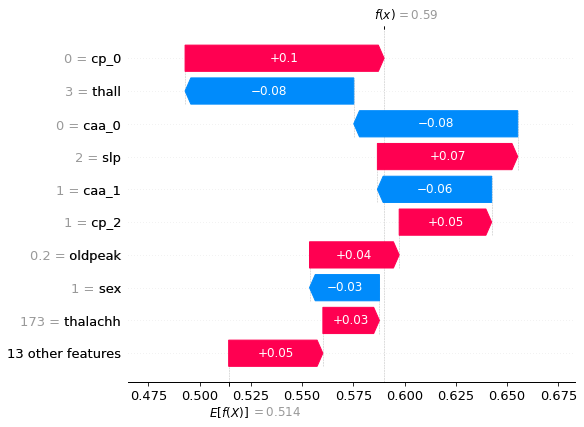

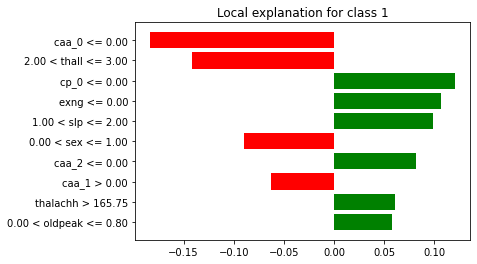

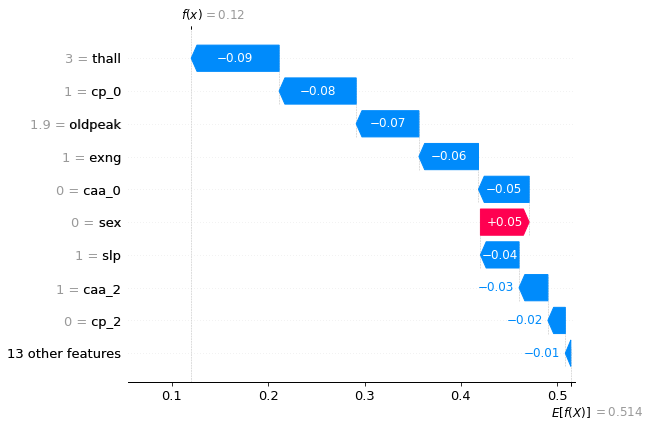

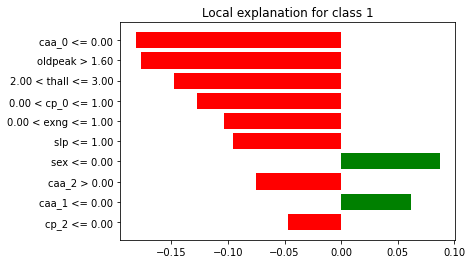

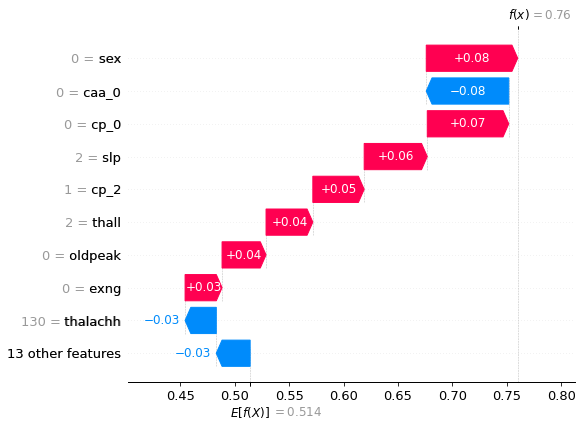

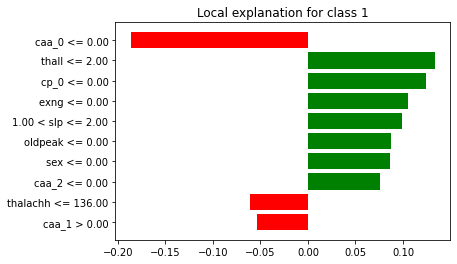

In [6]:
_ = plot_explain(2, method='both'), plot_explain(3, method='both'), plot_explain(4, method='both')

## 5.

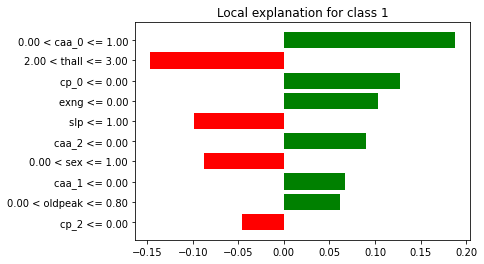

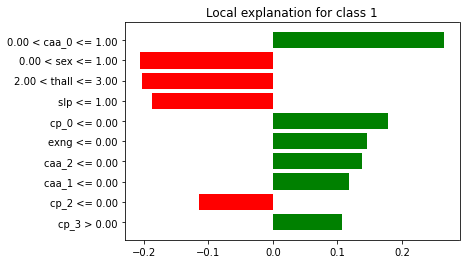

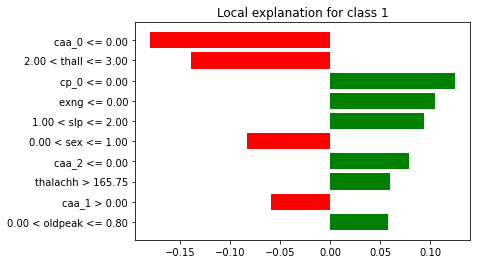

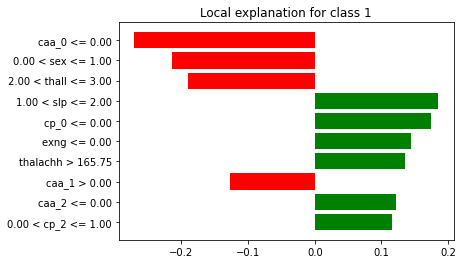

In [7]:
_ = plot_explain(1, method='lime', linear=False), plot_explain(1, method='lime', linear=True)
_ = plot_explain(2, method='lime', linear=False), plot_explain(2, method='lime', linear=True)

## 6.
All conclusions are present in the 3. - 5. sections above.